# Gaussian Process

We look for the model in the uncountably infinite space of functions. More specifically the model is a distribution over this space.

A stochastic process is a probability distribution over functions $f(\mathbf{x})$, where $\mathbf{x} \in \mathbb{R}^D$, such that, when evaluated at any arbitrary set of points $\mathbf{x}_1, \ldots, \mathbf{x}_N$, the values $f(\mathbf{x}_1), \ldots, f(\mathbf{x}_N)$ follow a specific joint, multivariate probability distribution. If this distribution is a normal distribution, then it is a Gaussian process.

In general, the covariance matrices arising in a Gaussian process are completely specified, if the $(i,j)$ entry is given by evaluating a kernel function at $\mathbf{x}_i$ and $\mathbf{x}_j$, i.e. $k(\mathbf{x}_i, \mathbf{x}_j)$. The covariance matrix is then the Gram matrix and positive definite.

While a draw from a Gaussian process is a function, the listing generates densely spaced point values. These are a draw from the distribution with the required covariance matrix, which is the Gram matrix $\mathbf{K}$ for the given kernel and points $\mathbf{x}_1, \ldots, \mathbf{x}_N$. Its Cholesky factorization $\mathbf{K} = \mathbf{L} \mathbf{L}^T$ is calculated. A vector $\mathbf{v}$ of length $N$ is drawn from the standard, multivariate normal distribution. We set $\mathbf{f} = \mathbf{L} \mathbf{v}$ which is then a random vector drawn from the multivariate normal distribution with covariance matrix $\mathbf{K}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constant kernel:
def kConst(x, y, param):
  k = np.square(param) * np.ones((x.shape[1], y.shape[1]))
  return k

In [3]:
# Linear kernel:
def kLinear(x, y, params):
  k = np.square(params[0]) +np.square(params[1]) * x.T @ y
  return k

In [4]:
# Quadratic kernel:
def kQuadratic(x,y,params):
  k = np.square(np.square(params[0]) +np.square(params[1]) * x.T @ y)
  return k

In [5]:
# Gaussian kernel:
def kGaussian(x,y,params):
  X, Y = np.meshgrid(x,y)
  sd = np.square(X-Y)
  k = np.square(params[0]) * np.exp(-1.0/np.square(params[1])*0.5*sd)
  return k

In [6]:
# Exponential kernel:
def kExponential(x,y,params):
  X, Y = np.meshgrid(x,y)
  sd = np.square(X-Y)
  k = np.square(params[0]) * np.exp(-1.0/params[1]*np.sqrt(sd))
  return k

In [7]:
# Inverse multiquadric kernel:
def kInverseMQ(x,y,params):
  X, Y = np.meshgrid(x,y)
  sd = np.square(X-Y)
  k = np.square(params[0]) * np.sqrt(np.reciprocal(1.0 + sd/
                                      np.square(params[1])*0.5))
  return k

In [8]:
x = np.atleast_2d(np.linspace(-5.0, 5.0, 101))
rng = np.random.default_rng()

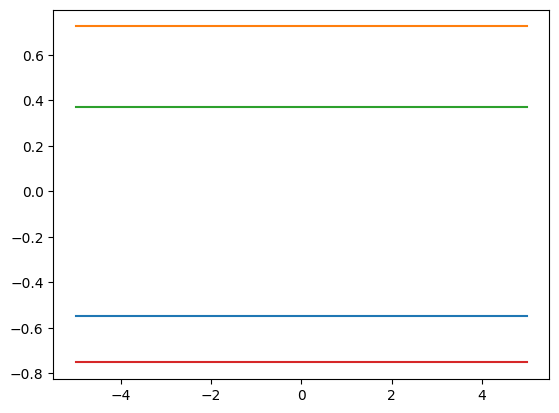

In [9]:
K = kConst(x, x, 1.0)
try:
  L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
  L = np.linalg.cholesky(K + 1e-14 * np.identity(K.shape[0]))
finally:
  for i in range(4):
    f = L @ np.atleast_2d(rng.multivariate_normal(np.zeros(x.shape[1]),
                                  np.identity(x.shape[1]))).T
    plt.plot(x.T,f)
  plt.show()

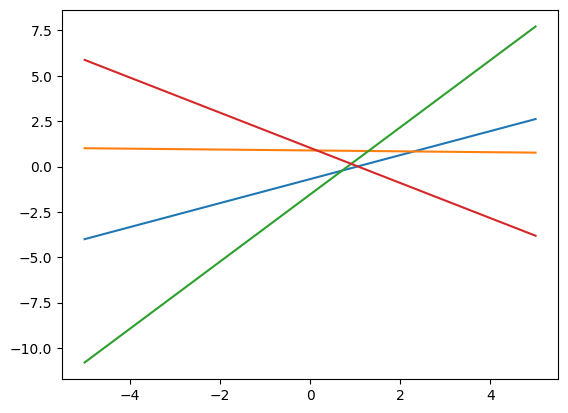

In [10]:
K = kLinear(x, x, [1.0, 1.0])
try:
  L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
  L = np.linalg.cholesky(K + 1e-13 * np.identity(K.shape[0]))
finally:
  for i in range(4):
    f = L @ np.atleast_2d(rng.multivariate_normal(np.zeros(x.shape[1]),
                                  np.identity(x.shape[1]))).T
    plt.plot(x.T,f)
  plt.show()

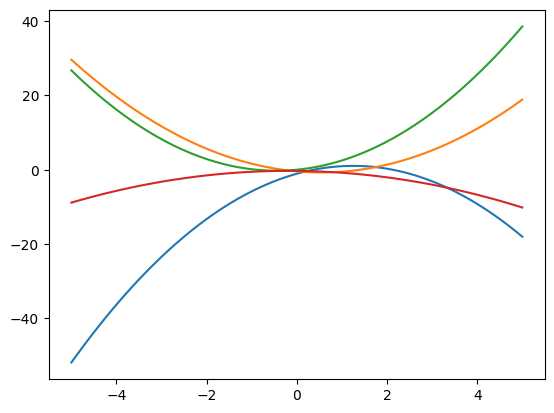

In [11]:
K = kQuadratic(x, x, [1.0, 1.0])
try:
  L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
  L = np.linalg.cholesky(K + 1e-11 * np.identity(K.shape[0]))
finally:
  for i in range(4):
    f = L @ np.atleast_2d(rng.multivariate_normal(np.zeros(x.shape[1]),
                                  np.identity(x.shape[1]))).T
    plt.plot(x.T,f)
  plt.show()

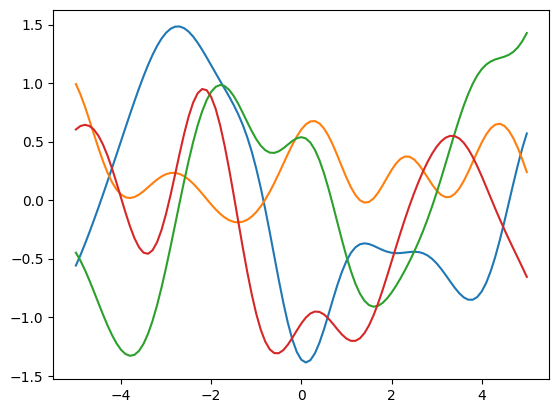

In [12]:
K = kGaussian(x, x, [1.0, 1.0])
try:
  L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
  L = np.linalg.cholesky(K + 1e-13 * np.identity(K.shape[0]))
finally:
  for i in range(4):
    f = L @ np.atleast_2d(rng.multivariate_normal(np.zeros(x.shape[1]),
                                  np.identity(x.shape[1]))).T
    plt.plot(x.T,f)
  plt.show()

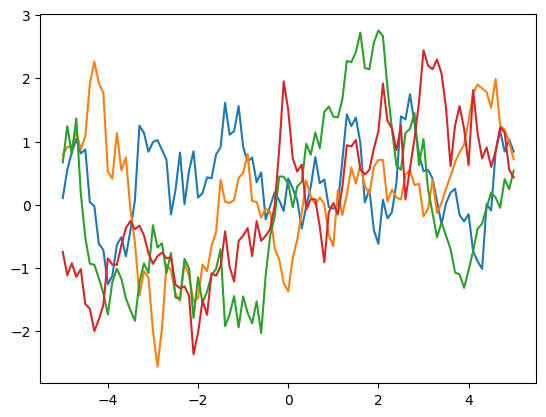

In [13]:
K = kExponential(x, x, [1.0, 1.0])
try:
  L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
  L = np.linalg.cholesky(K + 1e-13 * np.identity(K.shape[0]))
finally:
  for i in range(4):
    f = L @ np.atleast_2d(rng.multivariate_normal(np.zeros(x.shape[1]),
                                  np.identity(x.shape[1]))).T
    plt.plot(x.T,f)
  plt.show()

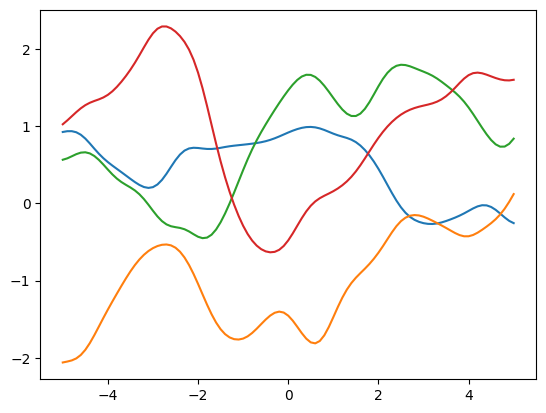

In [14]:
K = kInverseMQ(x, x, [1.0, 1.0])
try:
  L = np.linalg.cholesky(K)
except np.linalg.LinAlgError:
  L = np.linalg.cholesky(K + 1e-13 * np.identity(K.shape[0]))
finally:
  for i in range(4):
    f = L @ np.atleast_2d(rng.multivariate_normal(np.zeros(x.shape[1]),
                                  np.identity(x.shape[1]))).T
    plt.plot(x.T,f)
  plt.show()